In [1]:
!pip install transformers[torch]
!pip install SentencePiece
!pip install datasets


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# Try loading the model from trained
import torch
from transformers import T5Config, T5Tokenizer, T5ForConditionalGeneration

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Load model
model_test = T5ForConditionalGeneration.from_pretrained("model").to(device)
# Load tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")



/home/tranhuy/Desktop/Project/text2sql/venv/lib/python3.10/site-packages/torch/cuda/__init__.py:138: UserWarning: CUDA initialization: CUDA unknown error - this may be due to an incorrectly set up environment, e.g. changing env variable CUDA_VISIBLE_DEVICES after program start. Setting the available devices to be zero. (Triggered internally at ../c10/cuda/CUDAFunctions.cpp:108.)
  return torch._C._cuda_getDeviceCount() > 0
You are using the default legacy behaviour of the <class 'transformers.models.t5.tokenization_t5.T5Tokenizer'>. This is expected, and simply means that the `legacy` (previous) behavior will be used so nothing changes for you. If you want to use the new behaviour, set `legacy=False`. This should only be set if you understand what it means, and thouroughly read the reason why this was added as explained in https://github.com/huggingface/transformers/pull/24565
Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or t

In [3]:
def predict_test(context, question):
  inputs = tokenizer(f"query for: {question}? ",
                                        f"tables: {context}" ,
                                        max_length=200,
                                        padding="max_length",
                                        truncation=True,
                                        pad_to_max_length=True,
                                        add_special_tokens=True)

  input_ids = torch.tensor(inputs["input_ids"], dtype=torch.long).to(device).unsqueeze(0)
  attention_mask = torch.tensor(inputs["attention_mask"], dtype=torch.long).to(device).unsqueeze(0)
  outputs = model_test.generate(input_ids=input_ids, attention_mask=attention_mask, max_length=128)
  answer = tokenizer.decode(outputs.flatten(), skip_special_tokens=True)
  return answer

In [4]:
context = """""
CREATE TABLE classes (id INT, name TEXT);
"""
question = "what are the classes that having name start with 'A-'"

answer = predict_test(context, question)
answer

'SELECT DISTINCT classes.id FROM classes WHERE name LIKE "%A-%"'

In [5]:
inputs = tokenizer(f"query for: {question}? ",
                                        f"tables: {context}" ,
                                        max_length=200,
                                        padding="max_length",
                                        truncation=True,
                                        pad_to_max_length=True,
                                        add_special_tokens=True)
inputs2 = tokenizer(f"query for: {question}?tables: {context}",
                                        max_length=200,
                                        padding="max_length",
                                        truncation=True,
                                        pad_to_max_length=True,
                                        add_special_tokens=True)
print(inputs2.input_ids)


[11417, 21, 10, 125, 33, 8, 2287, 24, 578, 564, 456, 28, 3, 31, 188, 18, 31, 58, 3869, 7, 10, 96, 121, 205, 4386, 6048, 332, 17098, 2287, 41, 23, 26, 3, 13777, 6, 564, 3, 3463, 4, 382, 3670, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [6]:
tokenizer.decode(inputs.input_ids)

'query for: what are the classes that having name start with \'A-\'?</s> tables: "" CREATE TABLE classes (id INT, name TEXT);</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [7]:
tokenizer.decode(inputs2.input_ids)


'query for: what are the classes that having name start with \'A-\'?tables: "" CREATE TABLE classes (id INT, name TEXT);</s><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad><pad>'

In [8]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


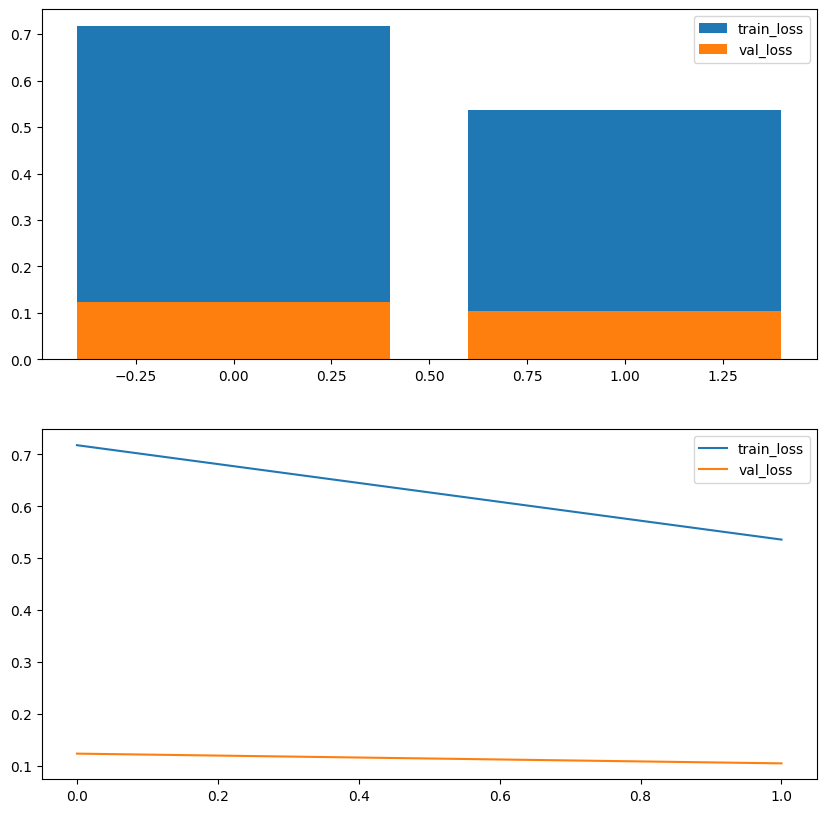

In [9]:
from matplotlib import pyplot as plt

train_loss = [0.7177304073486109, 0.5358534773037782]
val_loss = [0.12348765716516356, 0.10472056783884413]

# Draw column graph
fig, ax = plt.subplots(2,1, figsize=(10, 10))

ax[0].bar([0, 1], train_loss, label='train_loss')
ax[0].bar([0, 1], val_loss, label='val_loss')
ax[0].legend()

ax[1].plot(train_loss, label='train_loss')
ax[1].plot(val_loss, label='val_loss')
ax[1].legend()


plt.show()

In [24]:
question = "How many heads of the departments are older than 56 ?"
context = "CREATE TABLE head (age INTEGER)"
answer = "SELECT COUNT(*) FROM head WHERE age > 56"
inputs = tokenizer(f"query for: {question}? ",
                                        f"tables: {context}" ,
                                        max_length=200,
                                        padding="max_length",
                                        truncation=True,
                                        return_tensors="pt",
                                        pad_to_max_length=True,
                                        add_special_tokens=True).input_ids
labels = tokenizer(answer,
                    max_length=200,
                    padding="max_length",
                    truncation=True,
                   return_tensors="pt",
                    pad_to_max_length=True,
                    add_special_tokens=True).input_ids
labels[labels == 0] = -100

# forward pass
output = model_test(input_ids=inputs.to(device), labels=labels.to(device))
cross_entropy = torch.nn.CrossEntropyLoss(ignore_index=-100)
loss = cross_entropy(output.logits.view(-1, output.logits.shape[-1]), labels.view(-1))
print(loss)
output.loss.item()

tensor(2.2672, grad_fn=<NllLossBackward0>)


2.267153263092041

In [42]:
print(output.logits.view(-1, output.logits.shape[-1])[0])

tensor([  4.6184, -10.7802, -14.8922,  ..., -50.0962, -50.1075, -50.1533],
       grad_fn=<SelectBackward0>)
